The Needleman-Wunsch algorithm compares two arbitrary strings, and optimally under a given scoring scheme, returns the highest scoring alignment between the two.

Lets do a comparison of two gene orthologues for hemoglobin subunit beta, between the human and the mouse versions.
The indivudual mRNA sequences were obtained from NCBI, from 
Human: http://www.ensembl.org/Homo_sapiens/Transcript/Summary?db=core;g=ENSG00000244734;r=11:5225464-5229395;t=ENST00000335295
Mouse: http://www.ensembl.org/Mus_musculus/Transcript/Summary?db=core;g=ENSMUSG00000073940;r=7:103812524-103813996;t=ENSMUST00000098192

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

human_HBB = "ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAA"
mouse_HBB = "ATGGTGCACCTGACTGATGCTGAGAAGGCTGCTGTCTCTGGCCTGTGGGGAAAGGTGAACGCCGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTTGTCTACCCTTGGACCCAGCGGTACTTTGATAGCTTTGGAGACCTATCCTCTGCCTCTGCTATCATGGGTAATGCCAAAGTGAAGGCCCATGGCAAGAAAGTGATAACTGCCTTTAACGATGGCCTGAATCACTTGGACAGCCTCAAGGGCACCTTTGCCAGCCTCAGTGAGCTCCACTGTGACAAGCTGCATGTGGATCCTGAGAACTTCAGGCTCCTGGGCAATATGATCGTGATTGTGCTGGGCCACCACCTGGGCAAGGATTTCACCCCCGCTGCACAGGCTGCCTTCCAGAAGGTGGTGGCTGGAGTGGCTGCTGCCCTGGCTCACAAGTACCACTAA"

# human_HBB = "GATTACA" 
# mouse_HBB = "GCATTAT"


In order to perform alignment, we need to define a scoring function for sequences. A good starting point is to use a score of 1 for a match, -1 for a mismatch and -1 for a gaps

In [ ]:
def match_score(a,b):
  if a == b:
    return 1
  else:
    return -1

gap_score = -1

In [ ]:
def NeedlemanWunsch(query, subject, scorefunc):
  t0 = time.time()
  nwmatrix = np.zeros ((len(query)+1,len(subject)+1))
  # 
  for i in range(len(nwmatrix[0])):
    nwmatrix[0,i]= -i
  for i in range (len(nwmatrix)):
    nwmatrix[i,0]= -i

  # TODO: we need to initialize the first row and column of the matrix to increasing gap penalties
  for q in range(1,len(query)+1):
    for s in range(1,len(subject)+1):
      #the value of each cell is MAX(NW[q-1, s-1] + match_score, NW[q-1, s] + gap_score, NW[q, s-1] + gap_score)
      nwmatrix[q,s] = max(nwmatrix[q-1,s-1] + scorefunc(query[q-1],subject[s-1]), nwmatrix[q-1,s] + gap_score, nwmatrix[q,s-1] + gap_score) 
      

  traceback_position = [len(query), len(subject) ]
  sequence = []
  sequence2 = []
  row,col= len(query)  , len(subject)
  while row > 0 and col > 0:
    current = nwmatrix[row,col]
    up = nwmatrix[row-1,col]
    diag = nwmatrix[row-1,col-1]
    left = nwmatrix[row,col-1]    
    if diag + scorefunc(query[row-1],subject[col-1]) > left + gap_score and diag + scorefunc(query[row-1],subject[col-1]) > up +gap_score :
      sequence.append(subject[col-1])
      sequence2.append(query[row-1])
      col-=1
      row-=1

    elif up + gap_score > left + gap_score and up +gap_score >= diag + scorefunc(query[row-1],subject[col-1]):

      sequence.append("-")
      sequence2.append(query[row-1])
      row -=1

    else:
      sequence.append(subject[col-1])
      sequence2.append("-")
      col-=1
    
   
  sequence.reverse()
  sequence2.reverse()
  print(sequence)
  print(sequence2)


  alignment_score = nwmatrix[len(query)-1, len(subject) -1]

  print ('Alignment performed in %.3f seconds'%(time.time()-t0))
  
  sns.heatmap(nwmatrix)
  plt.show()
  return alignment_score 
    

The total alignment score is also present in the bottom right corner of the matrix.
If the traceback is not required, then often times just returning the score is sufficient

['A', 'T', 'G', 'G', 'T', 'G', 'C', 'A', 'C', 'C', 'T', 'G', 'A', 'C', 'T', 'G', 'A', 'T', 'G', 'C', 'T', 'G', 'A', 'G', 'A', 'A', 'G', 'G', 'C', 'T', 'G', 'C', 'T', 'G', 'T', 'C', 'T', '-', 'C', 'T', 'G', 'G', 'C', 'C', 'T', 'G', 'T', 'G', 'G', 'G', 'G', 'A', 'A', 'A', 'G', 'G', 'T', 'G', 'A', 'A', 'C', 'G', 'C', 'C', 'G', 'A', 'T', 'G', 'A', 'A', 'G', 'T', 'T', 'G', 'G', 'T', 'G', 'G', 'T', 'G', 'A', 'G', 'G', 'C', 'C', 'C', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'T', 'G', 'C', 'T', 'G', 'G', 'T', 'T', 'G', 'T', 'C', 'T', 'A', 'C', 'C', 'C', 'T', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'A', 'G', 'C', 'G', 'G', 'T', 'A', 'C', 'T', 'T', 'T', 'G', 'A', '-', 'T', 'A', 'G', 'C', 'T', 'T', 'T', 'G', 'G', 'A', 'G', 'A', 'C', 'C', 'T', 'A', 'T', 'C', 'C', 'T', 'C', 'T', 'G', 'C', 'C', 'T', 'C', '-', 'T', 'G', 'C', 'T', 'A', 'T', 'C', 'A', 'T', 'G', 'G', 'G', 'T', 'A', 'A', 'T', 'G', 'C', 'C', 'A', 'A', 'A', 'G', '-', 'T', 'G', 'A', 'A', 'G', 'G', 'C', 'C', 'C', 'A', 'T', 'G', 'G', 'C', 'A',

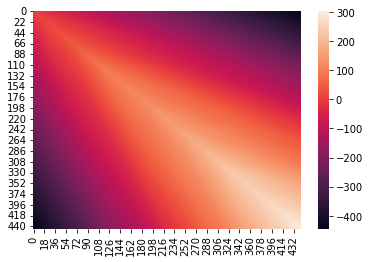

In [ ]:

score = NeedlemanWunsch(human_HBB,mouse_HBB,match_score)



Note the time it takes to run your algorithm. I will give extra credit to the fastest implementations. Naturally, you dont have to include the drawing of the diagrams inside the calculation.


Next, try to implement the Smith Waterman Algorithm:

In [ ]:
def SmithWaterman(query,subject,scorefunc):
  swmatrix = np.zeros ((len(query)+1,len(subject)+1)) #in Smith-Waterman, we only initialize to 0
  
  for q in range(1,len(query)+1):
    for s in range(1,len(subject)+1):
      #the value of each cell is MAX[NW[q-1, s-1] + match_score, NW[q-1, s] + gap_score, NW[q, s-1] + gap_score, 0]
      #Note that we cannot go below 0!
      swmatrix[q,s] = max(swmatrix[q-1,s-1]+ scorefunc(query[q-1],subject[s-1]), swmatrix[q-1,s] -1 , swmatrix[q,s-1] + gap_score,0 ) #TODO
      
  sequence = []
  sequence2 = []
  current = 1
  row,col= len(query)  , len(subject)
  while current > 0 or (row > 0 and col > 0):
    current = swmatrix[row,col]
    up = swmatrix[row-1,col]
    diag = swmatrix[row-1,col-1]
    left = swmatrix[row,col-1]    
    if diag + scorefunc(query[row-1],subject[col-1]) > left + gap_score and diag + scorefunc(query[row-1],subject[col-1]) > up +gap_score :
      sequence.append(subject[col-1])
      sequence2.append(query[row-1])
      col-=1
      row-=1

    elif up + gap_score > left + gap_score and up +gap_score >= diag + scorefunc(query[row-1],subject[col-1]):

      sequence.append("-")
      sequence2.append(query[row-1])
      row -=1

    else:
      sequence.append(subject[col-1])
      sequence2.append("-")
      col-=1
    

  alignment_score = swmatrix[len(query)-1, len(subject) -1]
  #TODO: trace back from the highest scoring cell while score is greater than 0!
  fig, ax = plt.subplots(figsize=(25,10)) 
  sns.heatmap(swmatrix)
  plt.show()
  return alignment_score 

And compare the coding region of human_HBB with the entire mRNA transcript of human_HBB_CDS!

Are there multiple candidate matches? Are there multiple regions of long matches?

Answer: Yes there are two significant matches and one smaller match towards the end 

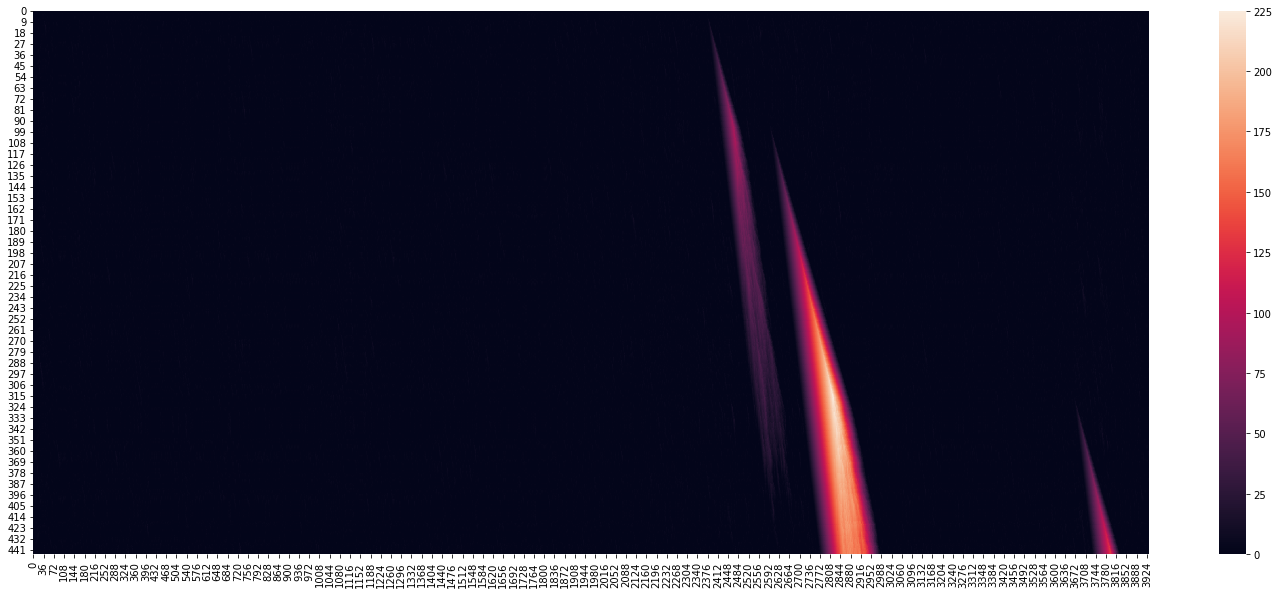

In [ ]:
                           
human_HBB_CDS = "TTGGAAAAGCAACCCCTGCCTTGAAGCCAGGATGATGGTATCTGCAGCAGTTGCCAACACAAGAGAAGGATCCATAGTTCATCATTTAAAAAAGAAAACAAAATAGAAAAAGGAAAACTATTTCTGAGCATAAGAAGTTGTAGGGTAAGTCTTTAAGAAGGTGACAATTTCTGCCAATCAGGATTTCAAAGCTCTTGCTTTGACAATTTTGGTCTTTCAGAATACTATAAATATAACCTATATTATAATTTCATAAAGTCTGTGCATTTTCTTTGACCCAGGATATTTGCAAAAGACATATTCAAACTTCCGCAGAACACTTTATTTCACATATACATGCCTCTTATATCAGGGATGTGAAACAGGGTCTTGAAAACTGTCTAAATCTAAAACAATGCTAATGCAGGTTTAAATTTAATAAAATAAAATCCAAAATCTAACAGCCAAGTCAAATCTGCATGTTTTAACATTTAAAATATTTTAAAGACGTCTTTTCCCAGGATTCAACATGTGAAATCTTTTCTCAGGGATACACGTGTGCCTAGATCCTCATTGCTTTAGTTTTTTACAGAGGAATGAATATAAAAAGAAAATACTTAAATTTTATCCCTCTTACCTCTATAATCATACATAGGCATAATTTTTTAACCTAGGCTCCAGATAGCCATAGAAGAACCAAACACTTTCTGCGTGTGTGAGAATAATCAGAGTGAGATTTTTTCACAAGTACCTGATGAGGGTTGAGACAGGTAGAAAAAGTGAGAGATCTCTATTTATTTAGCAATAATAGAGAAAGCATTTAAGAGAATAAAGCAATGGAAATAAGAAATTTGTAAATTTCCTTCTGATAACTAGAAATAGAGGATCCAGTTTCTTTTGGTTAACCTAAATTTTATTTCATTTTATTGTTTTATTTTATTTTATTTTATTTTATTTTGTGTAATCGTAGTTTCAGAGTGTTAGAGCTGAAAGGAAGAAGTAGGAGAAACATGCAAAGTAAAAGTATAACACTTTCCTTACTAAACCGACATGGGTTTCCAGGTAGGGGCAGGATTCAGGATGACTGACAGGGCCCTTAGGGAACACTGAGACCCTACGCTGACCTCATAAATGCTTGCTACCTTTGCTGTTTTAATTACATCTTTTAATAGCAGGAAGCAGAACTCTGCACTTCAAAAGTTTTTCCTCACCTGAGGAGTTAATTTAGTACAAGGGGAAAAAGTACAGGGGGATGGGAGAAAGGCGATCACGTTGGGAAGCTATAGAGAAAGAAGAGTAAATTTTAGTAAAGGAGGTTTAAACAAACAAAATATAAAGAGAAATAGGAACTTGAATCAAGGAAATGATTTTAAAACGCAGTATTCTTAGTGGACTAGAGGAAAAAAATAATCTGAGCCAAGTAGAAGACCTTTTCCCCTCCTACCCCTACTTTCTAAGTCACAGAGGCTTTTTGTTCCCCCAGACACTCTTGCAGATTAGTCCAGGCAGAAACAGTTAGATGTCCCCAGTTAACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTAAGTGACTTTTTATTTATTTGTATTTTTGACTGCATTAAGAGGTCTCTAGTTTTTTATCTCTTGTTTCCCAAAACCTAATAAGTAACTAATGCACAGAGCACATTGATTTGTATTTATTCTATTTTTAGACATAATTTATTAGCATGCATGAGCAAATTAAGAAAAACAACAACAAATGAATGCATATATATGTATATGTATGTGTGTATATATACACACATATATATATATATTTTTTCTTTTCTTACCAGAAGGTTTTAATCCAAATAAGGAGAAGATATGCTTAGAACCGAGGTAGAGTTTTCATCCATTCTGTCCTGTAAGTATTTTGCATATTCTGGAGACGCAGGAAGAGATCCATCTACATATCCCAAAGCTGAATTATGGTAGACAAAACTCTTCCACTTTTAGTGCATCAACTTCTTATTTGTGTAATAAGAAAATTGGGAAAACGATCTTCAATATGCTTACCAAGCTGTGATTCCAAATATTACGTAAATACACTTGCAAAGGAGGATGTTTTTAGTAGCAATTTGTACTGATGGTATGGGGCCAAGAGATATATCTTAGAGGGAGGGCTGAGGGTTTGAAGTCCAACTCCTAAGCCAGTGCCAGAAGAGCCAAGGACAGGTACGGCTGTCATCACTTAGACCTCACCCTGTGGAGCCACACCCTAGGGTTGGCCAATCTACTCCCAGGAGCAGGGAGGGCAGGAGCCAGGGCTGGGCATAAAAGTCAGGGCAGAGCCATCTATTGCTTACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGTTGGTATCAAGGTTACAAGACAGGTTTAAGGAGACCAATAGAAACTGGGCATGTGGAGACAGAGAAGACTCTTGGGTTTCTGATAGGCACTGACTCTCTCTGCCTATTGGTCTATTTTCCCACCCTTAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGGTGAGTCTATGGGACGCTTGATGTTTTCTTTCCCCTTCTTTTCTATGGTTAAGTTCATGTCATAGGAAGGGGATAAGTAACAGGGTACAGTTTAGAATGGGAAACAGACGAATGATTGCATCAGTGTGGAAGTCTCAGGATCGTTTTAGTTTCTTTTATTTGCTGTTCATAACAATTGTTTTCTTTTGTTTAATTCTTGCTTTCTTTTTTTTTCTTCTCCGCAATTTTTACTATTATACTTAATGCCTTAACATTGTGTATAACAAAAGGAAATATCTCTGAGATACATTAAGTAACTTAAAAAAAAACTTTACACAGTCTGCCTAGTACATTACTATTTGGAATATATGTGTGCTTATTTGCATATTCATAATCTCCCTACTTTATTTTCTTTTATTTTTAATTGATACATAATCATTATACATATTTATGGGTTAAAGTGTAATGTTTTAATATGTGTACACATATTGACCAAATCAGGGTAATTTTGCATTTGTAATTTTAAAAAATGCTTTCTTCTTTTAATATACTTTTTTGTTTATCTTATTTCTAATACTTTCCCTAATCTCTTTCTTTCAGGGCAATAATGATACAATGTATCATGCCTCTTTGCACCATTCTAAAGAATAACAGTGATAATTTCTGGGTTAAGGCAATAGCAATATCTCTGCATATAAATATTTCTGCATATAAATTGTAACTGATGTAAGAGGTTTCATATTGCTAATAGCAGCTACAATCCAGCTACCATTCTGCTTTTATTTTATGGTTGGGATAAGGCTGGATTATTCTGAGTCCAAGCTAGGCCCTTTTGCTAATCATGTTCATACCTCTTATCTTCCTCCCACAGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAAGCTCGCTTTCTTGCTGTCCAATTTCTATTAAAGGTTCCTTTGTTCCCTAAGTCCAACTACTAAACTGGGGGATATTATGAAGGGCCTTGAGCATCTGGATTCTGCCTAATAAAAAACATTTATTTTCATTGCAA"

score = SmithWaterman(human_HBB,human_HBB_CDS,match_score)


Change the scoring function to have higher penalties for both gaps and mismatches. Align human_HBB with human_HBB_CDS again with the new scores using the SW algorithm. How did this change our results?

Answer: Now the background in the heatmap is more black due to the big mismatch score and the second significant match is less strong now with faded bottom which means that the more significant match is probably the one we are searching for.


Try defining an even better scoring function, one that adds higher penalties to purine/pyrimidine mismatches, as those are evolutionarily less likely, and compare the human and mouse HBB genes.
Answer: Comparing the heatmap I found in the end of this document to the one in the beginning, I can see how changing the scoring function eliminated the upper half of the heatmap.


Finally, dont forget to share this notebook with me, so I can take a look at your results (psarkozy@mit.bme.hu)

In [ ]:
def match_score(a,b):
  if a == b:
    return 1
  else:
    return -3

gap_score = -4

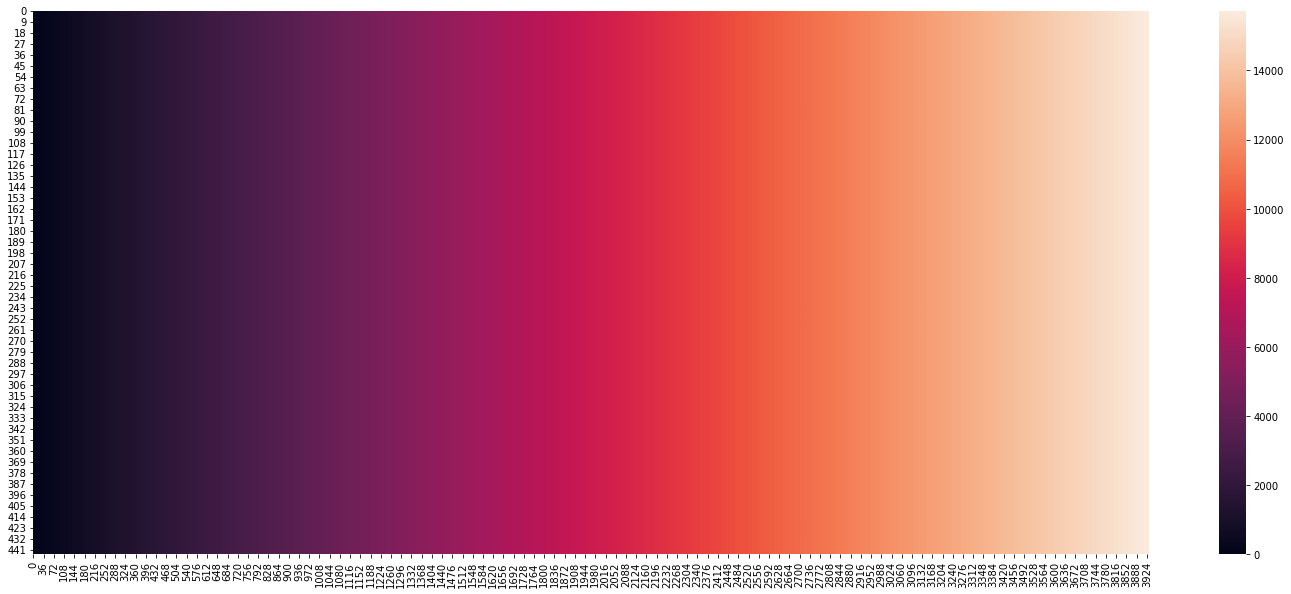

In [ ]:
                           
human_HBB_CDS = "TTGGAAAAGCAACCCCTGCCTTGAAGCCAGGATGATGGTATCTGCAGCAGTTGCCAACACAAGAGAAGGATCCATAGTTCATCATTTAAAAAAGAAAACAAAATAGAAAAAGGAAAACTATTTCTGAGCATAAGAAGTTGTAGGGTAAGTCTTTAAGAAGGTGACAATTTCTGCCAATCAGGATTTCAAAGCTCTTGCTTTGACAATTTTGGTCTTTCAGAATACTATAAATATAACCTATATTATAATTTCATAAAGTCTGTGCATTTTCTTTGACCCAGGATATTTGCAAAAGACATATTCAAACTTCCGCAGAACACTTTATTTCACATATACATGCCTCTTATATCAGGGATGTGAAACAGGGTCTTGAAAACTGTCTAAATCTAAAACAATGCTAATGCAGGTTTAAATTTAATAAAATAAAATCCAAAATCTAACAGCCAAGTCAAATCTGCATGTTTTAACATTTAAAATATTTTAAAGACGTCTTTTCCCAGGATTCAACATGTGAAATCTTTTCTCAGGGATACACGTGTGCCTAGATCCTCATTGCTTTAGTTTTTTACAGAGGAATGAATATAAAAAGAAAATACTTAAATTTTATCCCTCTTACCTCTATAATCATACATAGGCATAATTTTTTAACCTAGGCTCCAGATAGCCATAGAAGAACCAAACACTTTCTGCGTGTGTGAGAATAATCAGAGTGAGATTTTTTCACAAGTACCTGATGAGGGTTGAGACAGGTAGAAAAAGTGAGAGATCTCTATTTATTTAGCAATAATAGAGAAAGCATTTAAGAGAATAAAGCAATGGAAATAAGAAATTTGTAAATTTCCTTCTGATAACTAGAAATAGAGGATCCAGTTTCTTTTGGTTAACCTAAATTTTATTTCATTTTATTGTTTTATTTTATTTTATTTTATTTTATTTTGTGTAATCGTAGTTTCAGAGTGTTAGAGCTGAAAGGAAGAAGTAGGAGAAACATGCAAAGTAAAAGTATAACACTTTCCTTACTAAACCGACATGGGTTTCCAGGTAGGGGCAGGATTCAGGATGACTGACAGGGCCCTTAGGGAACACTGAGACCCTACGCTGACCTCATAAATGCTTGCTACCTTTGCTGTTTTAATTACATCTTTTAATAGCAGGAAGCAGAACTCTGCACTTCAAAAGTTTTTCCTCACCTGAGGAGTTAATTTAGTACAAGGGGAAAAAGTACAGGGGGATGGGAGAAAGGCGATCACGTTGGGAAGCTATAGAGAAAGAAGAGTAAATTTTAGTAAAGGAGGTTTAAACAAACAAAATATAAAGAGAAATAGGAACTTGAATCAAGGAAATGATTTTAAAACGCAGTATTCTTAGTGGACTAGAGGAAAAAAATAATCTGAGCCAAGTAGAAGACCTTTTCCCCTCCTACCCCTACTTTCTAAGTCACAGAGGCTTTTTGTTCCCCCAGACACTCTTGCAGATTAGTCCAGGCAGAAACAGTTAGATGTCCCCAGTTAACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTAAGTGACTTTTTATTTATTTGTATTTTTGACTGCATTAAGAGGTCTCTAGTTTTTTATCTCTTGTTTCCCAAAACCTAATAAGTAACTAATGCACAGAGCACATTGATTTGTATTTATTCTATTTTTAGACATAATTTATTAGCATGCATGAGCAAATTAAGAAAAACAACAACAAATGAATGCATATATATGTATATGTATGTGTGTATATATACACACATATATATATATATTTTTTCTTTTCTTACCAGAAGGTTTTAATCCAAATAAGGAGAAGATATGCTTAGAACCGAGGTAGAGTTTTCATCCATTCTGTCCTGTAAGTATTTTGCATATTCTGGAGACGCAGGAAGAGATCCATCTACATATCCCAAAGCTGAATTATGGTAGACAAAACTCTTCCACTTTTAGTGCATCAACTTCTTATTTGTGTAATAAGAAAATTGGGAAAACGATCTTCAATATGCTTACCAAGCTGTGATTCCAAATATTACGTAAATACACTTGCAAAGGAGGATGTTTTTAGTAGCAATTTGTACTGATGGTATGGGGCCAAGAGATATATCTTAGAGGGAGGGCTGAGGGTTTGAAGTCCAACTCCTAAGCCAGTGCCAGAAGAGCCAAGGACAGGTACGGCTGTCATCACTTAGACCTCACCCTGTGGAGCCACACCCTAGGGTTGGCCAATCTACTCCCAGGAGCAGGGAGGGCAGGAGCCAGGGCTGGGCATAAAAGTCAGGGCAGAGCCATCTATTGCTTACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGTTGGTATCAAGGTTACAAGACAGGTTTAAGGAGACCAATAGAAACTGGGCATGTGGAGACAGAGAAGACTCTTGGGTTTCTGATAGGCACTGACTCTCTCTGCCTATTGGTCTATTTTCCCACCCTTAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGGTGAGTCTATGGGACGCTTGATGTTTTCTTTCCCCTTCTTTTCTATGGTTAAGTTCATGTCATAGGAAGGGGATAAGTAACAGGGTACAGTTTAGAATGGGAAACAGACGAATGATTGCATCAGTGTGGAAGTCTCAGGATCGTTTTAGTTTCTTTTATTTGCTGTTCATAACAATTGTTTTCTTTTGTTTAATTCTTGCTTTCTTTTTTTTTCTTCTCCGCAATTTTTACTATTATACTTAATGCCTTAACATTGTGTATAACAAAAGGAAATATCTCTGAGATACATTAAGTAACTTAAAAAAAAACTTTACACAGTCTGCCTAGTACATTACTATTTGGAATATATGTGTGCTTATTTGCATATTCATAATCTCCCTACTTTATTTTCTTTTATTTTTAATTGATACATAATCATTATACATATTTATGGGTTAAAGTGTAATGTTTTAATATGTGTACACATATTGACCAAATCAGGGTAATTTTGCATTTGTAATTTTAAAAAATGCTTTCTTCTTTTAATATACTTTTTTGTTTATCTTATTTCTAATACTTTCCCTAATCTCTTTCTTTCAGGGCAATAATGATACAATGTATCATGCCTCTTTGCACCATTCTAAAGAATAACAGTGATAATTTCTGGGTTAAGGCAATAGCAATATCTCTGCATATAAATATTTCTGCATATAAATTGTAACTGATGTAAGAGGTTTCATATTGCTAATAGCAGCTACAATCCAGCTACCATTCTGCTTTTATTTTATGGTTGGGATAAGGCTGGATTATTCTGAGTCCAAGCTAGGCCCTTTTGCTAATCATGTTCATACCTCTTATCTTCCTCCCACAGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAAGCTCGCTTTCTTGCTGTCCAATTTCTATTAAAGGTTCCTTTGTTCCCTAAGTCCAACTACTAAACTGGGGGATATTATGAAGGGCCTTGAGCATCTGGATTCTGCCTAATAAAAAACATTTATTTTCATTGCAA"

score = SmithWaterman(human_HBB,human_HBB_CDS,match_score)


In [ ]:
def match_score1(a,b):
  if a == b:
    return 1
  elif (a == "A" and b =="C" ) or (a =="C" and b == "A"):
    return -3
  else:
    return -2
gap_score = -2


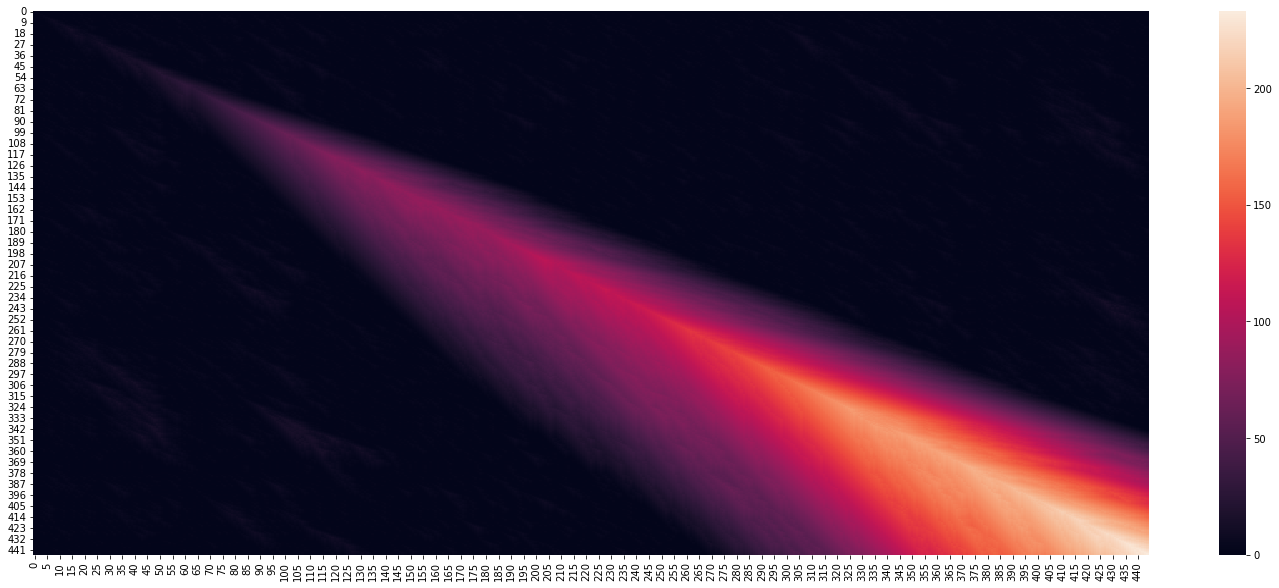

In [ ]:
                           
score = SmithWaterman(human_HBB,mouse_HBB,match_score1)

In [ ]:
ts1 = "325789"
ts2 ="232368"

In [ ]:
def match_score33(a,b):
  if a == b:
    return 1
  else:
    return 0

gap_score = 0

['2', '3', '2', '-', '-', '3', '6', '8', '-']
['3', '-', '2', '5', '7', '-', '-', '8', '9']
Alignment performed in 0.000 seconds


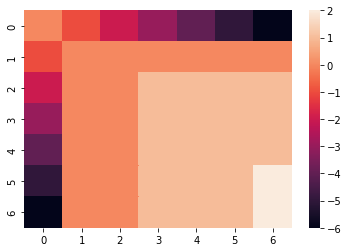

In [ ]:
score = NeedlemanWunsch(ts1,ts2,match_score33)

